In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [2]:
import matplotlib
params = {
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
}
matplotlib.rcParams.update(params)

In [3]:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

/tmp/ipykernel_1996/2544458749.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, gauss(x, *popt), 'r-', label='Gaussian Fit', linestyle='--')


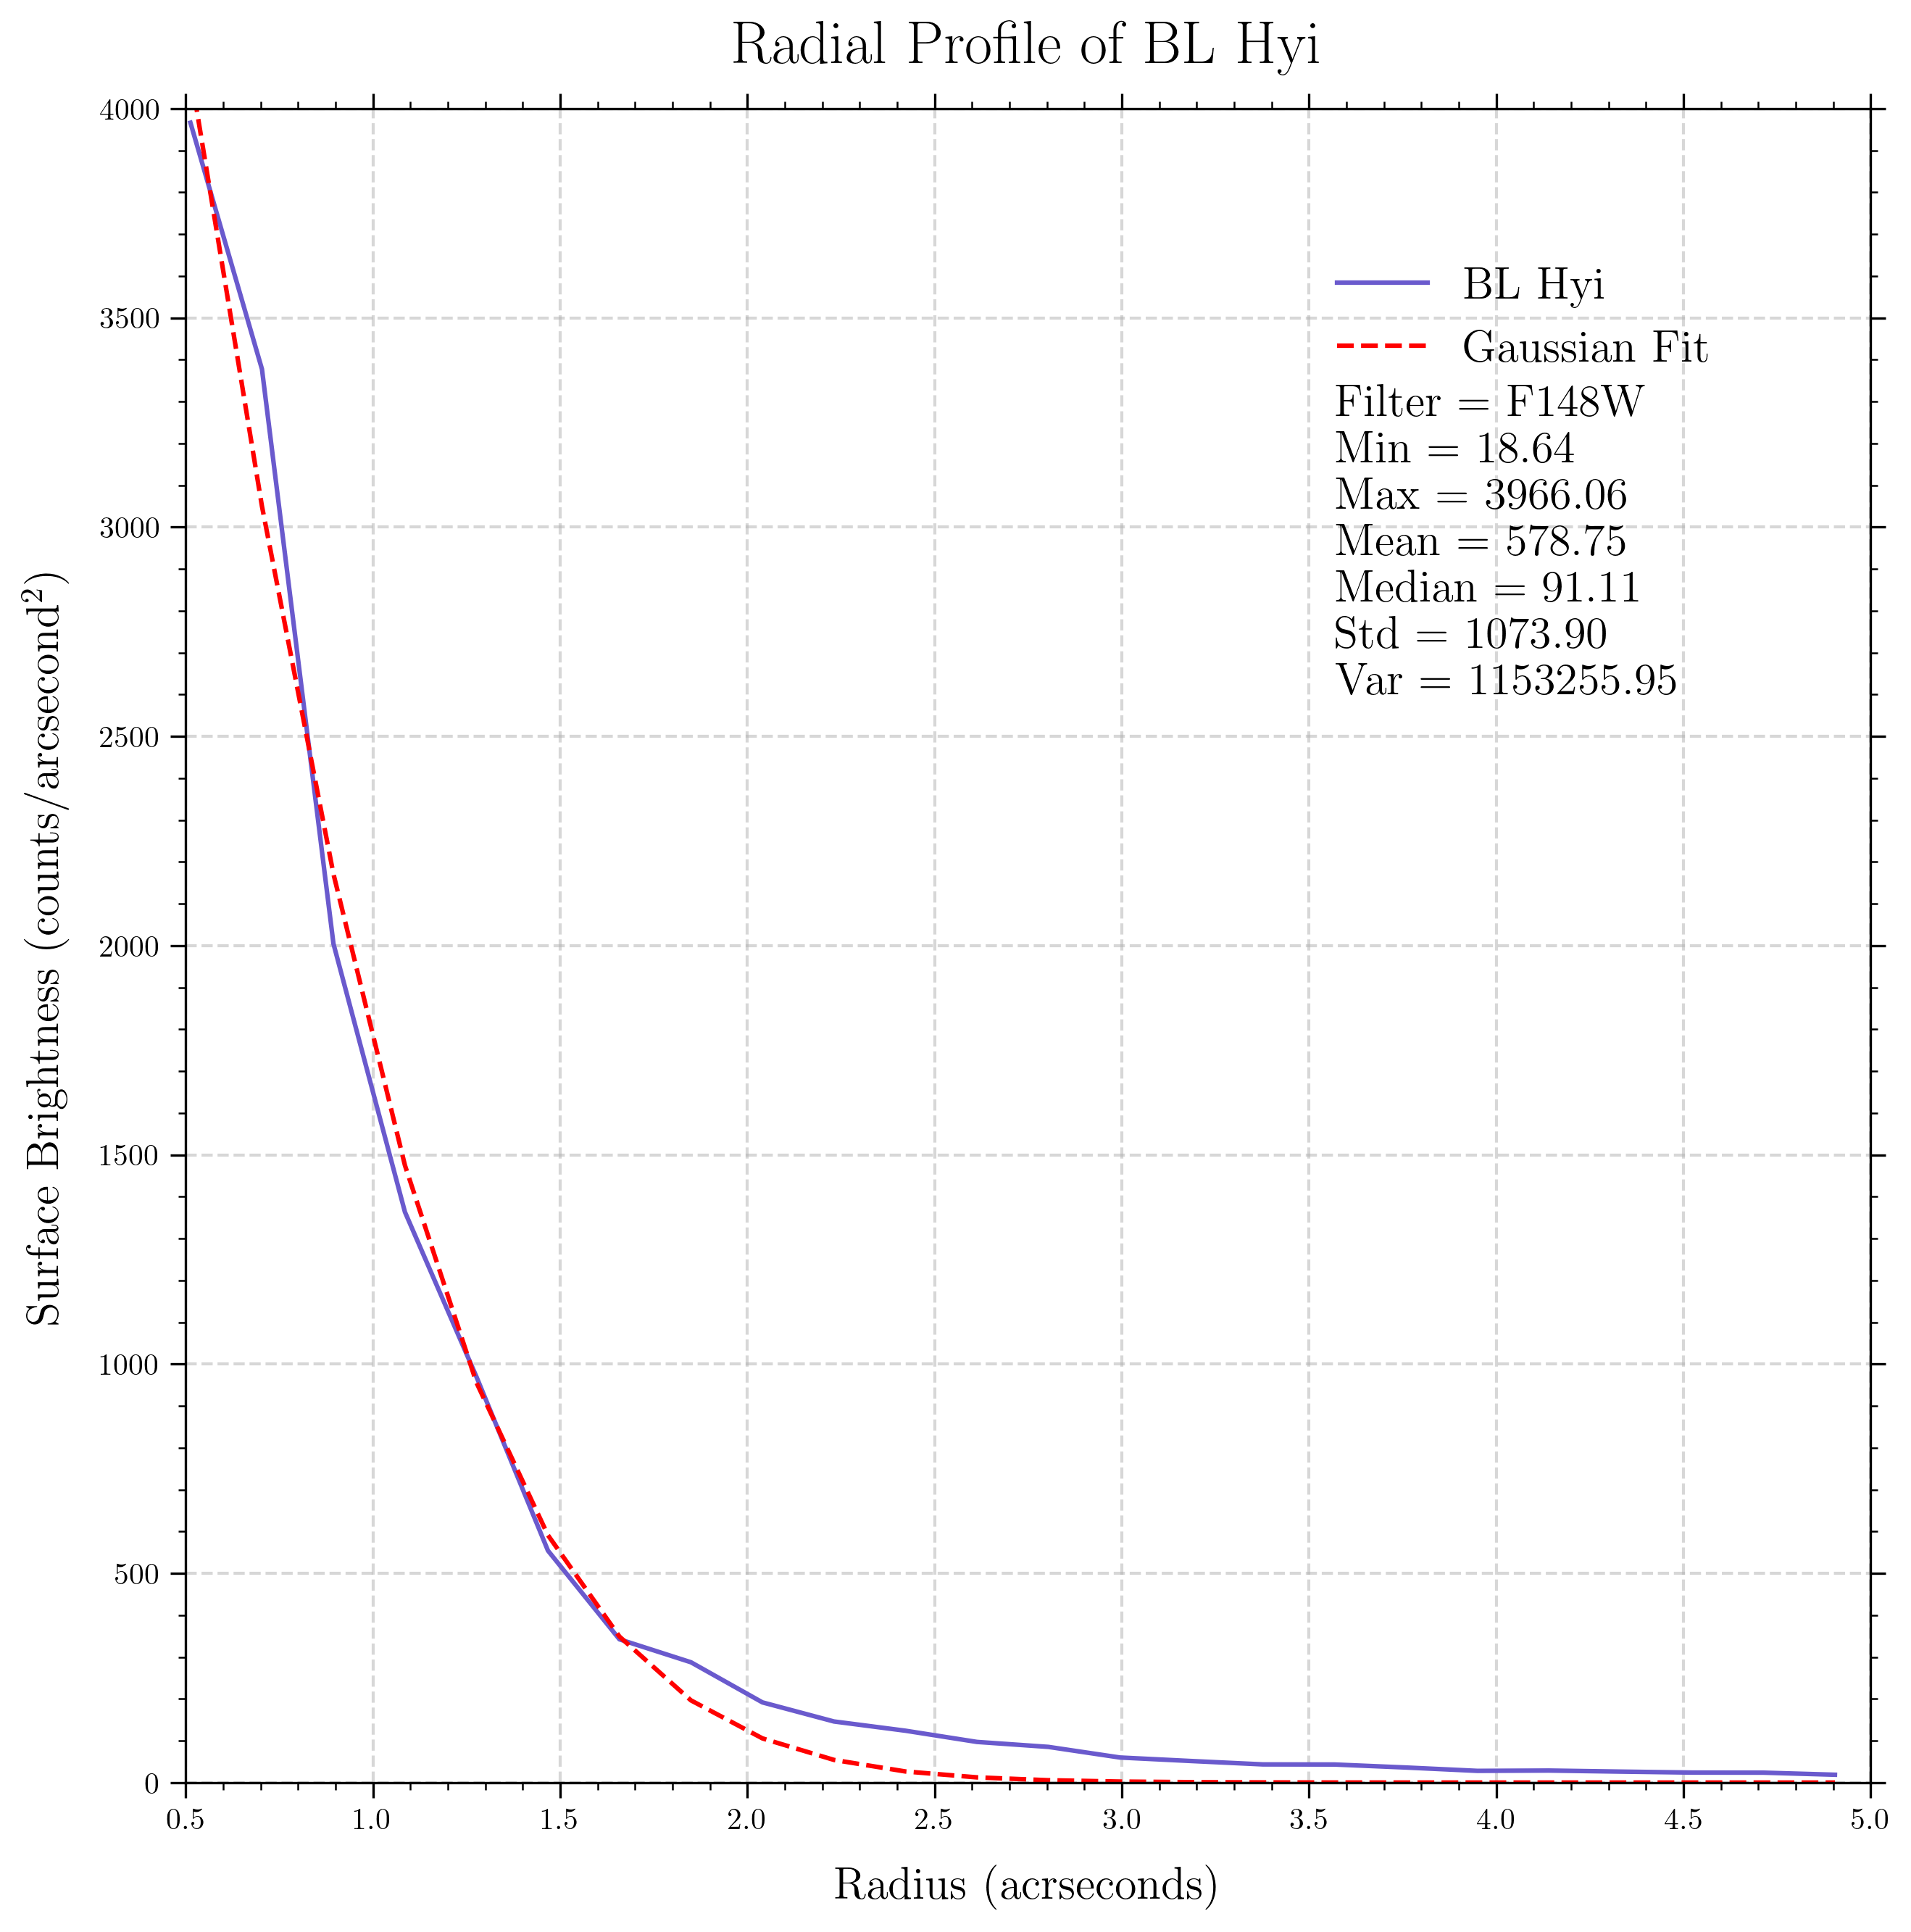

In [11]:
tab = pd.read_csv('radial_profile_ds9.csv')
x = tab['x']
y = tab['y']
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, color='slateblue', label = 'BL Hyi')
ax.set_title('Radial Profile of BL Hyi', fontsize=20, pad=15, fontweight='bold')
ax.set_xlim(0.5, 5)
ax.set_ylim(0, 4000)
ax.set_xlabel('Radius (acrseconds)', fontsize=15, labelpad=10)
ax.set_ylabel(r'Surface Brightness (counts/arcsecond$^{2}$)', fontsize=15, labelpad=10)
ax.grid(alpha=0.5, linestyle='--', linewidth=1)
popt, pcov = curve_fit(gauss, x, y, p0=[3000, 2.5, 0.5])
ax.plot(x, gauss(x, *popt), 'r-', label='Gaussian Fit', linestyle='--')
ax.legend(frameon=False, borderpad=3, fontsize=15)
std = np.std(y, ddof=1)
mean = np.mean(y)
var = np.var(y, ddof=1)
min_val = np.min(y)
max_val = np.max(y)
median = np.median(y)
ax.text(3.57, 2600, f' Filter = F148W \n Min = {min_val:.2f} \n Max = {max_val:.2f} \n Mean = {mean:.2f} \n Median = {median:.2f} \n Std = {std:.2f} \n Var = {var:.2f}', fontsize=15)
plt.show()
#fig.savefig('radial_profile_ds9.png', format='png')

In [5]:
hdu = fits.open('BL Hyi_FUV_CaF2___MASTER_IMAGE_archive.fits')[0]
data = hdu.data
header = hdu.header
header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file conforms to FITS standard                 
BITPIX  =                  -64 / bits per pixel                                 
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4800 / number of elements on this axis                
NAXIS2  =                 4800 / number of elements on this axis                
BZERO   =                    0 / data offset                                    
BSCALE  =                    1 / data scaling                                   
EXTEND  =                    T / file may contain extensions                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'ASTROSAT          ' /                                                
ORIGIN  = 'ASTROSAT-UVIT-L1  ' / Configuration Control                          
MEANBJD =      2457589.97551

In [13]:
test = fits.open("AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.rsp")
test.info()
test[2].header

Filename: AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.rsp
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  EBOUNDS       1 BinTableHDU     29   512R x 3C   [I, E, E]   
  2  MATRIX        1 BinTableHDU     44   300R x 6C   [E, E, I, J, J, PE(512)]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   26 / width of table in bytes                        
NAXIS2  =                  300 / number of rows in table                        
PCOUNT  =               614400 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'N_GRP   '        